In [213]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.model_selection as ms

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import scipy.stats as scs

In [201]:
houses = pd.read_csv('../data/train_withdummy.csv')
min_r2 = .15
max_cov_r2 = .65
y_col = 'SalePrice'

In [215]:
def reduce_variables(df, y_col, min_r2, max_cov_r2):
    y = houses[y_col]
    score = {}
    for col in houses.columns:
        X = houses[col]
        score[col] = scs.linregress(y, X).rvalue
    score = pd.Series(score)
    abs_score = np.abs(score)
    ## ignore plot
    #plt.scatter(np.arange(abs_score.size), abs_score.sort_values())
    keep_cols = abs_score[abs_score > min_r2]
    cov_score = pd.Series()
    for col1, rval1 in keep_cols.iteritems():
        y = houses[col1]
        for col2, rval2 in keep_cols.iteritems():
            X = houses[col2]
            cov_score['{}%{}'.format(col1,col2)] = scs.linregress(y, X).rvalue
    abs_cov_score = np.abs(cov_score)
    ## ignore plot
    #plt.scatter(np.arange(abs_cov_score.size), abs_cov_score.sort_values())
    now_drop = abs_cov_score[(abs_cov_score > max_cov_r2) & (abs_cov_score != 1)]
    ## drop every other value (because they will be in pairs)
    drops = now_drop.sort_values(ascending=False).index[::2]
    drops = pd.Series(drops).apply(lambda x: x.split('%')[0])
    new_keep_cols = list(keep_cols.drop(list(drops)).index)
    new_keep_cols.append(y_col)
    return houses[new_keep_cols]

In [211]:
# nvars = reduce_variables(houses, y_col, min_r2, max_cov_r2)

['1stFlrSF', 'BedroomAbvGr', 'BsmtExposure$Gd', 'BsmtExposure$No', 'BsmtFinSF1', 'BsmtFinType1$GLQ', 'BsmtFullBath', 'BsmtQual$Ex', 'BsmtQual$Gd', 'BsmtUnfSF', 'CentralAir$Y', 'Electrical$FuseA', 'ExterQual$Ex', 'Exterior1st$MetalSd', 'Exterior1st$VinylSd', 'Exterior2nd$Wd Sdng', 'FireplaceQu$Ex', 'FireplaceQu$Gd', 'FireplaceQu$TA', 'Fireplaces', 'Foundation$BrkTil', 'FullBath', 'GarageCars', 'GarageFinish$Fin', 'GarageFinish$RFn', 'GarageFinish$Unf', 'GarageQual$TA', 'GarageType$BuiltIn', 'GarageType$Detchd', 'HalfBath', 'HeatingQC$TA', 'KitchenQual$Ex', 'KitchenQual$Fa', 'KitchenQual$TA', 'LotArea', 'LotFrontage', 'LotShape$IR1', 'MSSubClass$1-1/2 STORY FINISHED ALL AGES', 'MSSubClass$1-STORY 1945 & OLDER', 'MSZoning$RL', 'MasVnrArea', 'MasVnrType$BrkFace', 'MasVnrType$Stone', 'Neighborhood$Edwards', 'Neighborhood$IDOTRR', 'Neighborhood$NAmes', 'Neighborhood$NoRidge', 'Neighborhood$NridgHt', 'Neighborhood$OldTown', 'Neighborhood$StoneBr', 'OpenPorchSF', 'PavedDrive$N', 'RoofMatl$WdSh

In [222]:
houses = pd.read_csv('../data/train_withdummy.csv')
min_r2 = .15
max_cov_r2 = .65
y_col = 'SalePrice'

scores = {}

for value in np.linspace(.05, .7, 30):
    min_r2 = value
    df = reduce_variables(houses, y_col, min_r2, max_cov_r2)
    y = df['SalePrice']
    X = df.drop('SalePrice', axis=1)
    Xtr, Xte, ytr, yte = ms.train_test_split(X, y, train_size=.90)
    model = lm.LinearRegression(n_jobs=-1)
    model.fit(Xtr, ytr)
    scores[value] = np.abs(model.score(Xte, yte))
    

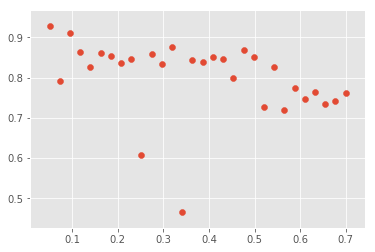

In [225]:
min_r2_scores = pd.Series(scores)
plt.scatter(min_r2_scores.index, min_r2_scores)

In [227]:
houses = pd.read_csv('../data/train_withdummy.csv')
min_r2 = .05
# max_cov_r2 = .65
y_col = 'SalePrice'

cov_scores = {}
cov_predict = {}

for value in np.linspace(.5, .75, 4):
    max_cov_r2 = value
    df = reduce_variables(houses, y_col, min_r2, max_cov_r2)
    y = df['SalePrice']
    X = df.drop('SalePrice', axis=1)
    Xtr, Xte, ytr, yte = ms.train_test_split(X, y, train_size=.80)
    model = lm.LinearRegression(n_jobs=-1)
    model.fit(Xtr, ytr)
    cov_scores[value] = np.abs(model.score(Xte, yte))
    cov_predict[value] = model.predict(Xte)
cov_scores = pd.Series(cov_scores)

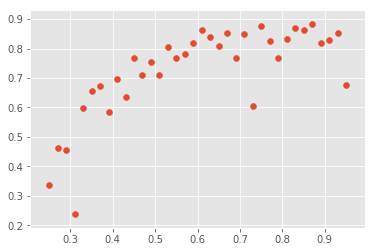

In [231]:
plt.scatter(cov_scores.index, cov_scores)

In [240]:
# predicts = pd.DataFrame(*cov_predict.items())

In [257]:
houses = pd.read_csv('../data/train_withdummy.csv')
min_r2 = .12
max_cov_r2 = .78
y_col = 'SalePrice'

df = reduce_variables(houses, y_col, min_r2, max_cov_r2)

In [258]:
df.columns.shape

(96,)

In [259]:
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)
Xtr, Xte, ytr, yte = ms.train_test_split(X, y, train_size=.80)
model = lm.LinearRegression(n_jobs=-1)
model.fit(Xtr, ytr)
score = np.abs(model.score(Xte, yte))
predict  = model.predict(Xte)

In [260]:
score

0.79189028323029387